<a href="https://colab.research.google.com/github/AyeshaAnzerBCIT/Multisource/blob/main/BehaviouralPreprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gcsfs
import pandas as pd
import numpy as np

#  Authenticate and Initialize Google Cloud Storage (GCS)
fs = gcsfs.GCSFileSystem(token="Key.json")  # Replace with correct key if needed

#  Define the Behavioral Data Path in GCS
BEHAVIORAL_DIR = "eegchild/EEG_extracted/"
OUTPUT_FILE = "eegchild/processed_features/behavioral_features.csv"

#  **Step 1: List All Behavioral CSV Files in GCS**
behavioral_files = fs.glob(f"{BEHAVIORAL_DIR}**/Behavioral/csv/*.csv")

print(f" Found {len(behavioral_files)} Behavioral CSV files.")
print(f" First 10 files: {behavioral_files[:10]}")


 Found 1066 Behavioral CSV files.
 First 10 files: ['eegchild/EEG_extracted//A00051826/Behavioral/csv/A00051826_SAIIT_2AFC_Block1.csv', 'eegchild/EEG_extracted//A00051826/Behavioral/csv/A00051826_SAIIT_2AFC_Block2.csv', 'eegchild/EEG_extracted//A00051826/Behavioral/csv/A00051826_SAIIT_2AFC_Block3.csv', 'eegchild/EEG_extracted//A00051826/Behavioral/csv/A00051826_SurroundSupp_Block1.csv', 'eegchild/EEG_extracted//A00051826/Behavioral/csv/A00051826_SurroundSupp_Block2.csv', 'eegchild/EEG_extracted//A00051826/Behavioral/csv/A00051826_Video_1.csv', 'eegchild/EEG_extracted//A00051826/Behavioral/csv/A00051826_Video_2.csv', 'eegchild/EEG_extracted//A00051826/Behavioral/csv/A00051826_Video_3.csv', 'eegchild/EEG_extracted//A00051826/Behavioral/csv/A00051826_WISC_ProcSpeed.csv', 'eegchild/EEG_extracted//A00051826/Behavioral/csv/A00051826_vis_learn.csv']


In [ ]:
##### # Pick one file to inspect
sample_file = behavioral_files[0]

print(f" Inspecting: {sample_file}")

# Open the file and print the first few lines
with fs.open(sample_file, 'r') as f:
    df_sample = pd.read_csv(f)
    print(" Sample Column Names:", df_sample.columns)
    print(" First 5 rows:")
    print(df_sample.head())


 Inspecting: eegchild/EEG_extracted//A00051826/Behavioral/csv/A00051826_SAIIT_2AFC_Block1.csv
 Sample Column Names: Index(['trialITI', 'trialLR', 'RespLR', 'FlickF', 'numtargets', 'outerrad_deg',
       'innerrad_deg', 'targrampdur', 'CD_TG', 'CD_TGOFF', 'CD_BUTTONS',
       'CD_RESP', 'CD_FIXON', 'useEL', 'useEL_Calib', 'recordEEG'],
      dtype='object')
 First 5 rows:
   trialITI  trialLR  RespLR  FlickF  numtargets  outerrad_deg  innerrad_deg  \
0       4.4      1.0       1    20.0        24.0           6.0           1.0   
1       2.8      2.0       2    25.0         NaN           NaN           NaN   
2       2.8      2.0       1     NaN         NaN           NaN           NaN   
3       2.8      2.0       1     NaN         NaN           NaN           NaN   
4       4.4      2.0       2     NaN         NaN           NaN           NaN   

   targrampdur  CD_TG  CD_TGOFF  CD_BUTTONS  CD_RESP  CD_FIXON  useEL  \
0          1.6    8.0       5.0        12.0     94.0       4.0    1.0   

In [ ]:
import gcsfs
import pandas as pd
import numpy as np

fs = gcsfs.GCSFileSystem(token="Key.json")

BEHAVIORAL_DIR = "eegchild/EEG_extracted/"
behavioral_files = fs.glob(f"{BEHAVIORAL_DIR}**/Behavioral/csv/*.csv")

all_results = []

for file in behavioral_files:
    print(f"Processing file: {file}")

    try:
        with fs.open(file, 'r') as f:
            df = pd.read_csv(f)

        if df.empty:
            print(f"Skipping {file} - Empty file")
            continue

        # Ensure required columns exist
        required_columns = ["CD_TG", "CD_RESP", "trialLR", "RespLR"]
        if not all(col in df.columns for col in required_columns):
            print(f"Skipping {file} - Required columns not found")
            continue

        # Compute reaction time
        df["reaction_time"] = df["CD_RESP"] - df["CD_TG"]

        # Compute accuracy (1 if correct, 0 if incorrect)
        df["accuracy"] = (df["trialLR"] == df["RespLR"]).astype(int)

        # Compute aggregate features
        features = {
            "file": file.split("/")[-1],
            "mean_rt": np.nanmean(df["reaction_time"]),
            "std_rt": np.nanstd(df["reaction_time"]),
            "median_rt": np.nanmedian(df["reaction_time"]),
            "min_rt": np.nanmin(df["reaction_time"]),
            "max_rt": np.nanmax(df["reaction_time"]),
            "accuracy": np.nanmean(df["accuracy"]) * 100  # Convert to percentage
        }

        all_results.append(features)

    except Exception as e:
        print(f"Error processing {file}: {e}")

# Save results
if all_results:
    final_df = pd.DataFrame(all_results)
    OUTPUT_FILE = "eegchild/processed_features/behavioral_features.csv"
    with fs.open(OUTPUT_FILE, 'w') as f:
        final_df.to_csv(f, index=False)

    print(f"Behavioral Data Processing Complete! Saved as {OUTPUT_FILE}")
else:
    print("No valid behavioral data found for processing.")


Processing file: eegchild/EEG_extracted//A00051826/Behavioral/csv/A00051826_SAIIT_2AFC_Block1.csv
Processing file: eegchild/EEG_extracted//A00051826/Behavioral/csv/A00051826_SAIIT_2AFC_Block2.csv
Processing file: eegchild/EEG_extracted//A00051826/Behavioral/csv/A00051826_SAIIT_2AFC_Block3.csv
Processing file: eegchild/EEG_extracted//A00051826/Behavioral/csv/A00051826_SurroundSupp_Block1.csv
Skipping eegchild/EEG_extracted//A00051826/Behavioral/csv/A00051826_SurroundSupp_Block1.csv - Required columns not found
Processing file: eegchild/EEG_extracted//A00051826/Behavioral/csv/A00051826_SurroundSupp_Block2.csv
Skipping eegchild/EEG_extracted//A00051826/Behavioral/csv/A00051826_SurroundSupp_Block2.csv - Required columns not found
Processing file: eegchild/EEG_extracted//A00051826/Behavioral/csv/A00051826_Video_1.csv
Skipping eegchild/EEG_extracted//A00051826/Behavioral/csv/A00051826_Video_1.csv - Required columns not found
Processing file: eegchild/EEG_extracted//A00051826/Behavioral/csv/A

In [ ]:
import gcsfs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize GCS file system with authentication
fs = gcsfs.GCSFileSystem(token="Key.json")

# Define the path to the processed behavioral features CSV file in GCS
behavioral_processed_features_path = "eegchild/processed_features/behavioral_features.csv"

# Use GCS to open the CSV file
with fs.open(behavioral_processed_features_path, 'r') as f:
    behavioral_stats_df = pd.read_csv(f)

# Display first few rows to ensure it's loaded correctly
print(behavioral_stats_df.head())


                              file  mean_rt  std_rt  median_rt  min_rt  \
0  A00051826_SAIIT_2AFC_Block1.csv     86.0     0.0       86.0    86.0   
1  A00051826_SAIIT_2AFC_Block2.csv     87.0     0.0       87.0    87.0   
2  A00051826_SAIIT_2AFC_Block3.csv     88.0     0.0       88.0    88.0   
3  A00051886_SAIIT_2AFC_Block1.csv     86.0     0.0       86.0    86.0   
4  A00051886_SAIIT_2AFC_Block2.csv     87.0     0.0       87.0    87.0   

   max_rt   accuracy  
0    86.0  21.818182  
1    87.0  18.333333  
2    88.0  23.684211  
3    86.0  20.000000  
4    87.0  40.740741  


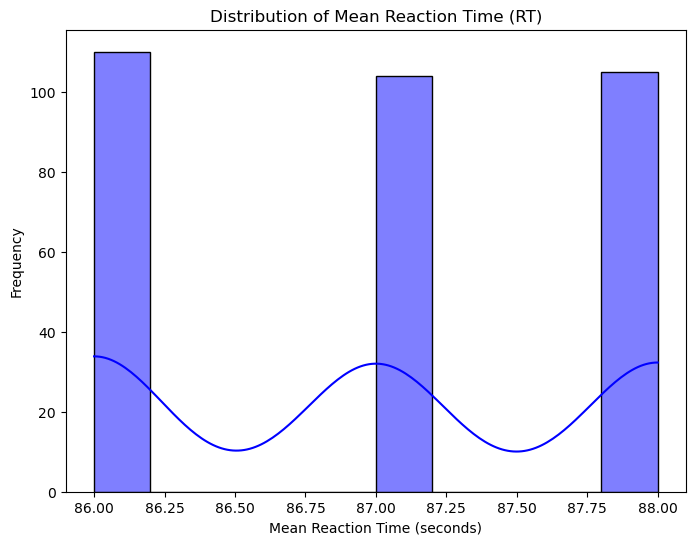

In [ ]:
# Visualization: Histogram of Mean Reaction Times (RT)
plt.figure(figsize=(8, 6))
sns.histplot(behavioral_stats_df['mean_rt'], kde=True, color='blue')
plt.title('Distribution of Mean Reaction Time (RT)')
plt.xlabel('Mean Reaction Time (seconds)')
plt.ylabel('Frequency')
plt.show()


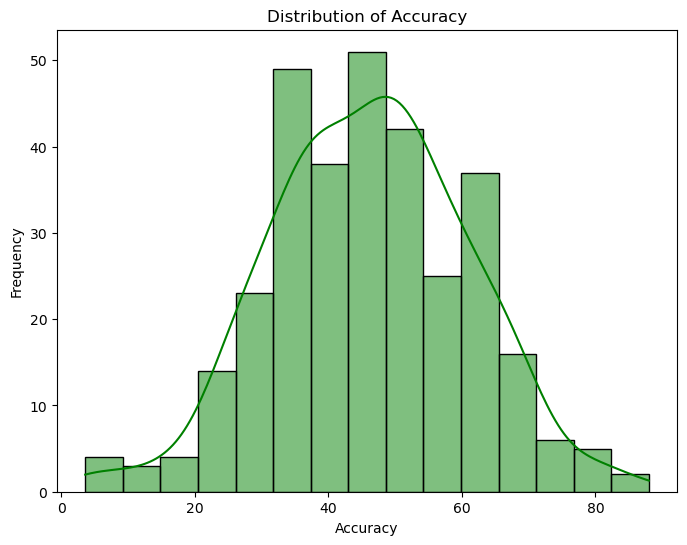

In [ ]:
# Visualization: Histogram of Accuracy
plt.figure(figsize=(8, 6))
sns.histplot(behavioral_stats_df['accuracy'], kde=True, color='green')
plt.title('Distribution of Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()